**CodeClause Project 2:**
**Customer Lifetime Value Prediction**

**Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('Customer_lifetime_value.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
print(df['State'].value_counts())
print(df['Gender'].value_counts())
df['EmploymentStatus'].value_counts()

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
Gender
F    4658
M    4476
Name: count, dtype: int64


EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

**Data preprocessing and Modeling**

In [16]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [18]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'])
df['Effective To Date'].to_timestamp

<bound method Series.to_timestamp of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective To Date, Length: 9134, dtype: datetime64[ns]>

In [20]:
lb=LabelEncoder()
df['Customer']=lb.fit_transform(df['Customer'])
df['State']=lb.fit_transform(df['State'])
df['Response']=lb.fit_transform(df['Response'])
df['Coverage']=lb.fit_transform(df['Coverage'])
df['Education']=lb.fit_transform(df['Education'])
df['EmploymentStatus']=lb.fit_transform(df['EmploymentStatus'])
df['Gender']=lb.fit_transform(df['Gender'])
df['Policy Type']=lb.fit_transform(df['Policy Type'])
df['Policy']=lb.fit_transform(df['Policy'])
df['Renew Offer Type']=lb.fit_transform(df['Renew Offer Type'])
df['Vehicle Class']=lb.fit_transform(df['Vehicle Class'])
df['Vehicle Size']=lb.fit_transform(df['Vehicle Size'])
df['Sales Channel']=lb.fit_transform(df['Sales Channel'])
df['Marital Status']=lb.fit_transform(df['Marital Status'])
df['Location Code']=lb.fit_transform(df['Location Code'])


**Correlation**

In [22]:
correlation_matrix = df.corr()
correlation_with_clv = correlation_matrix["Customer Lifetime Value"].sort_values(ascending=False)
print(correlation_with_clv)

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Coverage                         0.168040
Vehicle Class                    0.082307
Education                        0.026038
Income                           0.024366
Number of Policies               0.021955
Policy Type                      0.020011
Vehicle Size                     0.017098
Policy                           0.015217
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
State                            0.008778
Location Code                    0.004854
Sales Channel                   -0.003941
Effective To Date               -0.004844
Response                        -0.008930
Gender                          -0.013610
Marital Status                  -0.026003
Customer                        -0.028605
EmploymentStatus                -0.034846
Number of Open Complaints       -0.036343
Renew Offer Type                -0

In [24]:
top_features = correlation_with_clv.index[1:11]
print("Top features correlated with SalePrice:\n", top_features)

Top features correlated with SalePrice:
 Index(['Monthly Premium Auto', 'Total Claim Amount', 'Coverage',
       'Vehicle Class', 'Education', 'Income', 'Number of Policies',
       'Policy Type', 'Vehicle Size', 'Policy'],
      dtype='object')


In [26]:
new_df = df[top_features]
new_df

,Monthly Premium Auto,Total Claim Amount,Coverage,Vehicle Class,Education,Income,Number of Policies,Policy Type,Vehicle Size,Policy
0,69,384.811147,0,5,0,56274,1,0,1,2
1,94,1131.464935,1,0,0,0,8,1,1,5
2,108,566.472247,2,5,0,48767,2,1,1,5
3,106,529.881344,0,3,0,0,7,0,1,1
4,73,138.130879,0,0,0,43836,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...
9129,73,198.234764,0,0,0,71941,2,1,1,3
9130,79,379.200000,1,0,1,21604,1,0,1,2
9131,85,790.784983,1,0,0,0,2,0,1,1
9132,96,691.200000,1,0,1,21941,3,1,0,4


In [28]:
new_df['Customer Lifetime Value']=df['Customer Lifetime Value']
new_df

,Monthly Premium Auto,Total Claim Amount,Coverage,Vehicle Class,Education,Income,Number of Policies,Policy Type,Vehicle Size,Policy,Customer Lifetime Value
0,69,384.811147,0,5,0,56274,1,0,1,2,2763.519279
1,94,1131.464935,1,0,0,0,8,1,1,5,6979.535903
2,108,566.472247,2,5,0,48767,2,1,1,5,12887.431650
3,106,529.881344,0,3,0,0,7,0,1,1,7645.861827
4,73,138.130879,0,0,0,43836,1,1,1,3,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...
9129,73,198.234764,0,0,0,71941,2,1,1,3,23405.987980
9130,79,379.200000,1,0,1,21604,1,0,1,2,3096.511217
9131,85,790.784983,1,0,0,0,2,0,1,1,8163.890428
9132,96,691.200000,1,0,1,21941,3,1,0,4,7524.442436


**Skewness**

3.0322802599299847


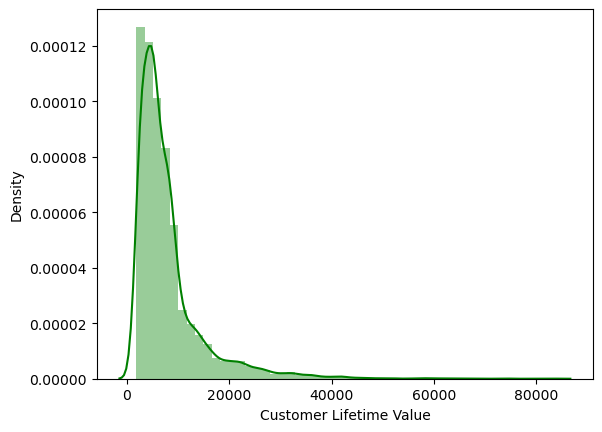

In [40]:
print(new_df['Customer Lifetime Value'].skew())
sns.distplot(new_df['Customer Lifetime Value'], color='green')
# Show the plot
plt.show()

**Distribution of Log-Transformed Customer Lifetime Value**

0.3915198518313467


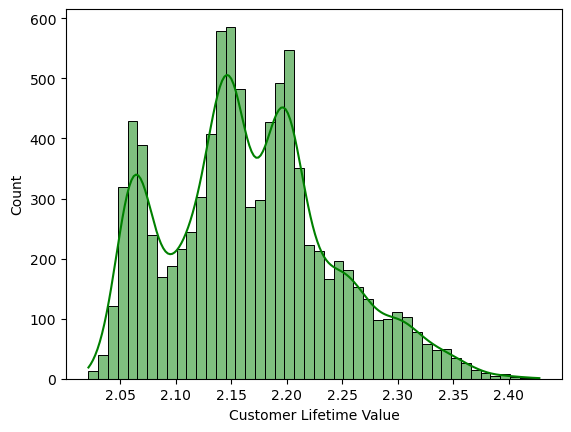

In [44]:
new_df['Customer Lifetime Value']=np.log(new_df['Customer Lifetime Value'])
sns.histplot(new_df['Customer Lifetime Value'], color='green', kde=True)
print(new_df['Customer Lifetime Value'].skew())

In [46]:
new_df['Total Claim Amount'].skew()
new_df['Total Claim Amount']=np.log(new_df['Total Claim Amount'])

In [48]:
new_df.index.is_unique

True

**Splitting Data**

In [50]:
X=new_df.drop(columns='Customer Lifetime Value',axis=1)
Y=new_df['Customer Lifetime Value']

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)

(6393, 10)
(2741, 10)


**Fitting and evaluating the linear regression model**

In [52]:
# Fit the linear regression model to the training data
model=LinearRegression()
model.fit(xtrain,ytrain)
print("Model :",model)

# Make predictions
prediction = model.predict(xtest)
print("Predicted Values :",prediction)

# Model Evaluation
acc = r2_score(ytest,prediction)*100
mae=mean_absolute_error(ytest,prediction)
mse=mean_squared_error(ytest,prediction)

Model : LinearRegression()
Predicted Values : [2.16529787 2.12537369 2.21675465 ... 2.16735704 2.141055   2.12970462]


In [54]:
# Print evaluation metrics
print(f"R2 score : {acc:.2f}")
print(f"Mean Absolute error {mae:.2f}")
print(f"Mean Squared error {mse:.2f}")

R2 score : 23.50
Mean Absolute error 0.05
Mean Squared error 0.00


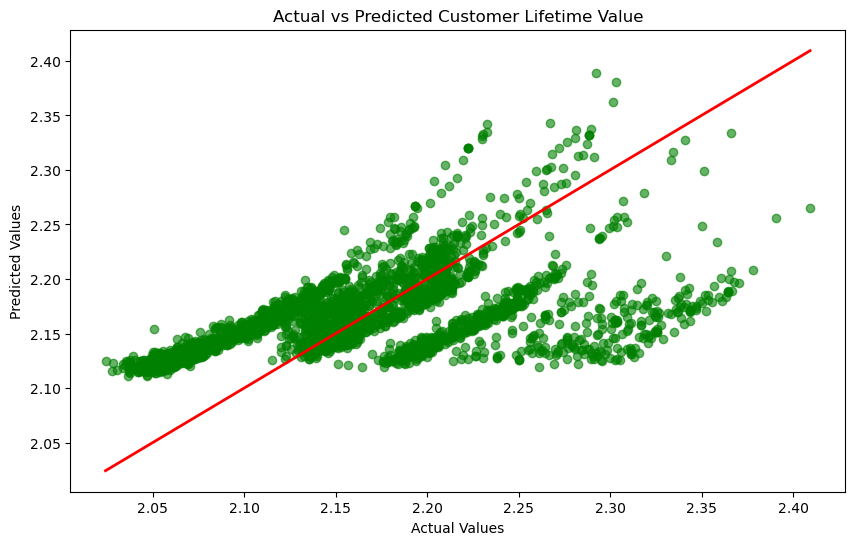

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, prediction, color='green', alpha=0.6)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linewidth=2)
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()